# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## Загрузка данных

Импортируем необходимые для работы библиотеки и инструменты:

In [28]:
# библиотеки
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# инструменты sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# блокиратор предупреждений
import warnings
warnings.filterwarnings("ignore")

Загрузим данные и ознакомимся с ними:

In [29]:
data = pd.read_csv('/datasets/insurance.csv')
display(data.sample(5))
print()
data.info()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
1571,1,31.0,43300.0,0,0
4833,0,24.0,32200.0,1,0
2370,1,39.0,49300.0,3,0
3025,1,34.0,51300.0,0,0
4614,1,27.0,46600.0,0,0



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


Проверим на наличие дубликатов и, при наличии, избавимся от них:

In [30]:
print("Явных дубликатов до обработки - ", data.duplicated().sum())
data.drop_duplicates(inplace=True)
print("Явных дубликатов после обработки - ", data.duplicated().sum())

Явных дубликатов до обработки -  153
Явных дубликатов после обработки -  0


Проверим данные на мультиколлинеарность при помощи матрицы корреляции:

<AxesSubplot:>

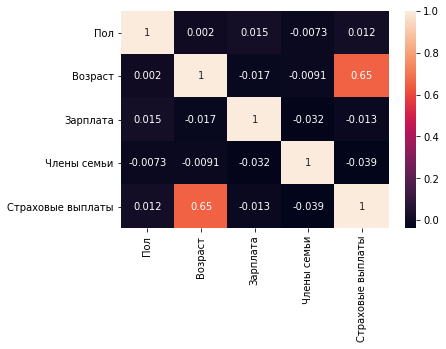

In [31]:
sns.heatmap(data.corr(), annot=True)

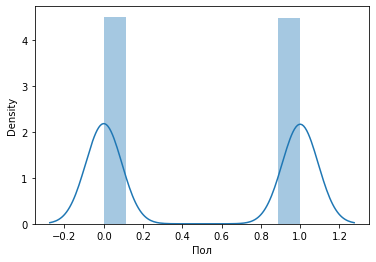

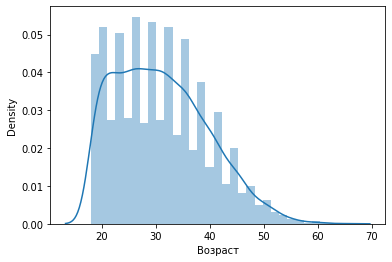

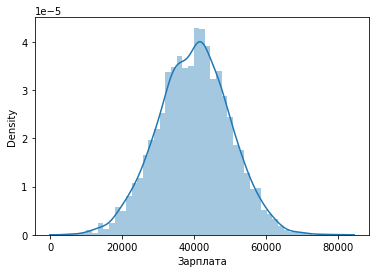

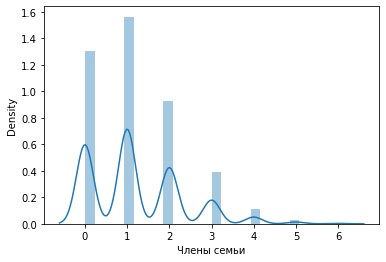

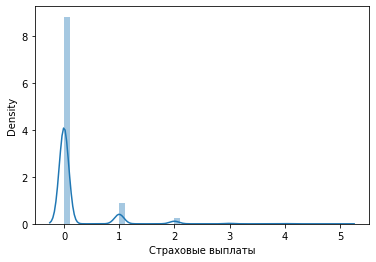

In [32]:
features = list(data)

for feature in features:
    sns.distplot(data[feature])
    plt.show()

Вывод о распределении признаков:

- **Пол**: распредление между "М" и "Ж" примерно равное, нет значительного перевеса в чью-либо сторону
- **Возраст**: возраст большинства клиентов в примерном диапазоне 18 - 35 лет, далее с увеличением возраста количество представителей снижается
- **Зарплата**: здесь наблюдается нормальное распределение, среднее значение приходится примерно на 45000
- **Члены семьи**: большинство клиентов имеют 0-2 членов семьи (видимо к членам семьи в этом пункте относили лишь супругов и детей), что соответсвуют гистограмме распределения по возрасту, т.к. основная часть клиентов в нашей выборке не старше 35 лет
- **Страховые выплаты**: основная масса клиентов ни разу не получала страховых  выплат судя по нашим данным

Вывод:
- данные не имеют пропущенных значений
- найденные явные дубликаты (153 шт) из данных удалены
- явной зависимости между признаками матрица корреляции не выявила (есть небольшая зависимость целевого признака от возраста клиента, но она не критичная, поэтому оставим все как есть)

Данные не требуют дальнейшей обработки и готовы для использования. 

## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Вопрос** Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии? (Её можно обучить заново)

**Ответ:** Нет, качество линейной регрессии не изменится

**Обоснование:** 
- Признаки $X$ умножают на обратимую матрицу $P$, формулы предсказания и обучения будут иметь вид: 

$$
a_1 = XPw_1
$$
$$
w_1 = ((XP)^T XP)^{-1} (XP)^T y
$$

- Подставим данные  $w_1$ из формулы обучения в формулу предсказания:

$$
a_1 = XP ((XP)^TXP)^{-1}(XP)^Ty
$$

- Воспользуемся свойством матриц $(AB)^T = A^TB^T$ и раскроем скобки с транспонированием:

$$
a_1 = XP (X^TP^TXP)^{-1}X^TP^Ty
$$

- Далее используя свойство матриц $(AB)^{-1} = A^{-1}B^{-1}$ вынесем за скобки множители $P^T$ и $P$:

$$
a_1 = XPP^{-1}(X^TX)^{-1}(P^T)^{-1}P^TX^Ty
$$

- Умножение матрицы на ее обратную матрицу дает единичную матрицу, соответственно произведения $PP^{-1}$ и $P^T(P^T)^{-1}$ в результате дадут единичные матрицы, а умножение матрицы на единичную дает саму эту матрицу, т.е. результаты указанных выше произведений можно из формулы исключить:

$$
a_1 = X(X^TX)^{-1}X^Ty
$$

- Обращаясь к изначальной формуле обучения можно заменить произведение $(X^TX)^{-1}X^Ty$ на $w$:

$$
a_1 = Xw = a
$$

- Полученная формула предсказания ровно такая же, как и изначальная, значит качество линейной регрессии не изменится

## Алгоритм преобразования

**Алгоритм**

В качестве алгоритма преобразования примем домножение обучающих признаков X на случайную обратимую матрицу P размером 4х4. Создадим модель линейной регрессии до преобразования и посчитаем метрику R2. Далее умножим исходные признаки на обратимую матрицу и на основе полученных значений вновь посчитаем метрику R2. Метрики R2 по итогу должны быть равны.

Матрицу P сгенерируем с помощью np.random.normal()

**Обоснование**

Как выяснилось в предыдущем пункте, домножение признаков на какую-либо обратимую матрицу не приводит к изменению качества линейной регрессии, поэтому результаты R2 должны совпасть.

## Проверка алгоритма

Разобьем данные на целевой и обучающие признаки:

In [33]:
features = data.drop('Страховые выплаты', axis=1)
target = data['Страховые выплаты']

 Создадим обратимую матрицу размером 4х4. По одной из теорем обратных матриц: для существования обратной матрицы $A^{-1}$ необходимо и достаточно, чтобы матрица $A$ была невырожденной, то есть, чтобы ее детерминант не был равен нулю. Заложим проверку данного условия при создании обратимой матрицы.

In [34]:
det = 0
while det == 0:
    P = np.random.normal(size=(4, 4))
    det = np.linalg.det(P)
P

array([[ 0.2032553 ,  0.03458836, -1.6236675 , -0.69388597],
       [-0.03007253, -0.50634948, -1.62304523,  0.71869368],
       [-0.64391183, -0.15028836,  2.00641382, -0.94699401],
       [-1.39164721,  0.56146498,  0.37039041, -0.12782511]])

Зашифруем данные обучающих признаков путем умножения их на полученную матрицу $P$:

In [35]:
features_p = features @ P
features_p.sample(3)

,0,1,2,3
4872,-26854.485194,-6279.032176,83624.374382,-39471.913565
4586,-31874.988799,-7462.059542,99244.447233,-46843.862099
4175,-27112.223108,-6338.675759,84430.186624,-39850.735976


Для проверки алгоритма проведем моделирование на исходных данных $features$ и на шифрованных данных $features_p$. Сравним метрики $R2$, согласно выводу из предыдущего пункта, метрики должны совпасть.

In [36]:
model = LinearRegression()
model.fit(features, target)
predictions = model.predict(features)
r2 = r2_score(target, predictions)
print(f'Метрика R2 модели на исходных данных: {r2:.5f}')

Метрика R2 модели на исходных данных: 0.43020


In [37]:
model_p = LinearRegression()
model_p.fit(features_p, target)
predictions_p = model_p.predict(features_p)
r2_p = r2_score(target, predictions_p)
print(f'Метрика R2 модели на шифрованных данных: {r2:.5f}')

Метрика R2 модели на шифрованных данных: 0.43020


**Вывод:**

Метрики R2 обеих моделей совпадают, значит наше предположение по алгоритму преобразования оказалось верным - для шифрования данных можно использовать умножение исходных данных на обратимую матрицу, качество линейной регрессии от такого преобразования не пострадает.